# Quantium Task2: Experimentation and Uplift Testing

# Problem Statement: 
    
    
Extend your analysis from Task 1 to help you identify benchmark stores that allow you to test the impact of the trial store layouts on customer sales.


To get started use the QVI_data dataset below or your output from task 1 and consider the monthly sales experience of each store. 

This can be broken down by:

- Total sales revenue
- Total number of customers
- Average number of transactions per customer

  1. Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.
  
  2. Once you have selected your control stores, compare each trial and control pair during the trial period. You want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.

    Main areas of focus are :

    a. Select control stores – Explore data, define metrics, visualize graphs
    
    b. Assessment of the trial – insights/trends by comparing trial stores with control stores
    
    c. Collate findings – summarize and provide recommendations 

# Importing required libraries

In [58]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

#setting grid style for plots
sns.set(style="darkgrid")

**Importing the dataset**

In [3]:
df = pd.read_csv('QVI_data (1).csv')

**Verifying the head of the dataframe**

In [4]:
df.head()

LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0            1000  2018-10-17          1       1         5   
1            1002  2018-09-16          1       2        58   
2            1003  2019-03-07          1       3        52   
3            1003  2019-03-08          1       4       106   
4            1004  2018-11-02          1       5        96   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        BRAND              LIFESTAGE PREMIUM_CUSTOMER  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1         RRD  YOUNG SINGLES/COUPLES       Mainstream  
2     GRNWVES         YOUNG FAMILIES           Budget  
3     NATURAL         YOUNG FAMILIES           Budget  
4  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream

**Verifying the tail of the dataframe**

In [5]:
df.tail()

LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
264829         2370701  2018-12-08         88  240378        24   
264830         2370751  2018-10-01         88  240394        60   
264831         2370961  2018-10-24         88  240480        70   
264832         2370961  2018-10-27         88  240481        65   
264833         2373711  2018-12-14         88  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
264829     Grain Waves         Sweet Chilli 210g         2        7.2   
264830      Kettle Tortilla ChpsFeta&Garlic 150g         2        9.2   
264831   Tyrrells Crisps     Lightly Salted 165g         2        8.4   
264832  Old El Paso Salsa   Dip Chnky Tom Ht300g         2       10.2   
264833  Smiths Crinkle Chips Salt & Vinegar 330g         2       11.4   

        PACK_SIZE     BRAND              LIFESTAGE PREMIUM_CUSTOMER  
264829        210   GRNWVES         YOUNG FAMILIES       Mainstream  
264830        150    KETTLE         YOUNG FAMILIES          Premium  
264831        165  TYRRELLS         OLDER FAMILIES           Budget  
264832        300       OLD         OLDER FAMILIES           Budget  
264833        330    SMITHS  YOUNG SINGLES/COUPLES       Mainstream

In [6]:
#setting the column width to max to read the description
pd.set_option('display.max_colwidth', None)

#setting the max display of output
pd.set_option('display.max_rows', None)

In [7]:
#Checking the shape:
df.shape

(264834, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


- Client has selected store numbers 77, 86 and 88 as trial stores.
- Client wants control stores to be established stores that are operational for the entire observation period.
- Trial period = 1 Feb 2019 to 30 April 2019.

In [17]:
df.describe()

LYLTY_CARD_NBR      STORE_NBR        TXN_ID       PROD_NBR  \
count    2.648340e+05  264834.000000  2.648340e+05  264834.000000   
mean     1.355488e+05     135.079423  1.351576e+05      56.583554   
std      8.057990e+04      76.784063  7.813292e+04      32.826444   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.002100e+04      70.000000  6.760050e+04      28.000000   
50%      1.303570e+05     130.000000  1.351365e+05      56.000000   
75%      2.030940e+05     203.000000  2.026998e+05      85.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES      PACK_SIZE      YEARMONTH  
count  264834.000000  264834.000000  264834.000000  264834.000000  
mean        1.905813       7.299346     182.425512  201856.055163  
std         0.343436       2.527241      64.325148      47.035278  
min         1.000000       1.500000      70.000000  201807.000000  
25%         2.000000       5.400000     150.000000  201809.000000  
50%         2.000000       7.400000     170.000000  201812.000000  
75%         2.000000       9.200000     175.000000  201903.000000  
max         5.000000      29.500000     380.000000  201906.000000

In [25]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'YEARMONTH'],
      dtype='object')

In [28]:
df["STORE_NBR"].value_counts()

226    2020
88     1873
93     1832
165    1819
237    1785
43     1771
40     1764
230    1751
213    1747
156    1747
58     1743
63     1742
128    1714
100    1711
152    1707
133    1703
179    1702
199    1687
168    1682
4      1678
71     1676
203    1661
201    1654
112    1651
81     1649
259    1642
130    1641
94     1641
26     1640
223    1636
69     1633
157    1631
270    1630
72     1628
257    1625
181    1623
178    1620
114    1610
269    1607
95     1606
33     1596
217    1588
261    1582
238    1579
160    1579
138    1579
184    1576
180    1575
210    1572
247    1569
13     1564
106    1563
137    1562
216    1561
55     1557
164    1553
123    1548
125    1545
227    1543
86     1538
57     1536
155    1535
225    1534
97     1529
236    1527
62     1527
105    1526
172    1526
49     1525
154    1523
113    1518
232    1517
65     1517
166    1517
194    1512
109    1505
229    1504
207    1504
3      1502
75     1501
153    1501
102    1499
250    1499
59  

# Store 77

In [29]:
store77 = df[df["STORE_NBR"] == 77]

In [30]:
store77

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
73365            77000 2019-03-28         77   74911        18   
73366            77000 2019-04-13         77   74912        69   
73367            77000 2018-09-26         77   74910        36   
73368            77001 2019-02-27         77   74913         7   
73369            77001 2019-01-21         77   74914         9   
73370            77002 2019-05-17         77   74915        63   
73371            77002 2019-06-18         77   74916       107   
73372            77003 2019-03-18         77   74917        80   
73373            77004 2018-07-18         77   74918        30   
73374            77004 2018-07-26         77   74919        46   
73375            77006 2019-01-13         77   74920        32   
73376            77006 2019-06-26         77   74921        15   
73377            77007 2019-03-20         77   74923         3   
73378            77007 2019-02-07         77   74924        14   
73379            77007 2018-09-08         77   74922         1   
73380            77008 2018-08-05         77   74925        37   
73381            77009 2019-02-09         77   74926        51   
73382            77009 2019-03-29         77   74927        79   
73383            77011 2019-06-21         77   74928         2   
73384            77014 2019-03-27         77   74929        83   
73385            77014 2019-06-07         77   74930        22   
73386            77015 2018-07-07         77   74931        85   
73387            77016 2019-05-28         77   74932        33   
73388            77018 2018-07-18         77   74933        50   
73389            77021 2018-11-07         77   74934        96   
73390            77023 2019-05-17         77   74935       110   
73391            77024 2019-02-22         77   74936        27   
73392            77025 2018-08-06         77   74938       110   
73393            77026 2018-08-13         77   74939        40   
73394            77026 2019-01-30         77   74940        56   
73395            77028 2018-10-03         77   74941        23   
73396            77029 2019-03-22         77   74942       100   
73397            77030 2018-09-07         77   74943        77   
73398            77031 2019-05-04         77   74944         1   
73399            77032 2019-06-24         77   74946        38   
73400            77032 2018-11-09         77   74945        59   
73401            77033 2019-05-19         77   74948         1   
73402            77033 2018-10-29         77   74947        36   
73403            77035 2019-02-06         77   74950        40   
73404            77035 2018-11-17         77   74949        89   
73405            77037 2019-04-18         77   74951        45   
73406            77038 2019-05-10         77   74952        94   
73407            77039 2019-05-07         77   74953        71   
73408            77040 2018-08-22         77   74954       111   
73409            77043 2019-01-08         77   74955        58   
73410            77043 2019-01-20         77   74956        19   
73411            77044 2018-08-06         77   74957        29   
73412            77044 2018-08-24         77   74958       101   
73413            77044 2019-05-24         77   74959        51   
73414            77045 2019-04-22         77   74960        98   
73415            77045 2019-02-22         77   74961        28   
73416            77046 2019-05-04         77   74962        99   
73417            77048 2018-10-22         77   74963       102   
73418            77049 2018-10-05         77   74965       114   
73419            77049 2018-07-14         77   74964        93   
73420            77049 2018-11-20         77   74966        77   
73421            77050 2019-02-27         77   74968        57   
73422            77050 2018-11-19         77   74967         1   
73423            77052 2018-09-26         77   74969        85   
73424            77053 2018-07-05         77   7

In [31]:
store77.reset_index(drop=True,inplace=True)
store77

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0             77000 2019-03-28         77   74911        18   
1             77000 2019-04-13         77   74912        69   
2             77000 2018-09-26         77   74910        36   
3             77001 2019-02-27         77   74913         7   
4             77001 2019-01-21         77   74914         9   
5             77002 2019-05-17         77   74915        63   
6             77002 2019-06-18         77   74916       107   
7             77003 2019-03-18         77   74917        80   
8             77004 2018-07-18         77   74918        30   
9             77004 2018-07-26         77   74919        46   
10            77006 2019-01-13         77   74920        32   
11            77006 2019-06-26         77   74921        15   
12            77007 2019-03-20         77   74923         3   
13            77007 2019-02-07         77   74924        14   
14            77007 2018-09-08         77   74922         1   
15            77008 2018-08-05         77   74925        37   
16            77009 2019-02-09         77   74926        51   
17            77009 2019-03-29         77   74927        79   
18            77011 2019-06-21         77   74928         2   
19            77014 2019-03-27         77   74929        83   
20            77014 2019-06-07         77   74930        22   
21            77015 2018-07-07         77   74931        85   
22            77016 2019-05-28         77   74932        33   
23            77018 2018-07-18         77   74933        50   
24            77021 2018-11-07         77   74934        96   
25            77023 2019-05-17         77   74935       110   
26            77024 2019-02-22         77   74936        27   
27            77025 2018-08-06         77   74938       110   
28            77026 2018-08-13         77   74939        40   
29            77026 2019-01-30         77   74940        56   
30            77028 2018-10-03         77   74941        23   
31            77029 2019-03-22         77   74942       100   
32            77030 2018-09-07         77   74943        77   
33            77031 2019-05-04         77   74944         1   
34            77032 2019-06-24         77   74946        38   
35            77032 2018-11-09         77   74945        59   
36            77033 2019-05-19         77   74948         1   
37            77033 2018-10-29         77   74947        36   
38            77035 2019-02-06         77   74950        40   
39            77035 2018-11-17         77   74949        89   
40            77037 2019-04-18         77   74951        45   
41            77038 2019-05-10         77   74952        94   
42            77039 2019-05-07         77   74953        71   
43            77040 2018-08-22         77   74954       111   
44            77043 2019-01-08         77   74955        58   
45            77043 2019-01-20         77   74956        19   
46            77044 2018-08-06         77   74957        29   
47            77044 2018-08-24         77   74958       101   
48            77044 2019-05-24         77   74959        51   
49            77045 2019-04-22         77   74960        98   
50            77045 2019-02-22         77   74961        28   
51            77046 2019-05-04         77   74962        99   
52            77048 2018-10-22         77   74963       102   
53            77049 2018-10-05         77   74965       114   
54            77049 2018-07-14         77   74964        93   
55            77049 2018-11-20         77   74966        77   
56            77050 2019-02-27         77   74968        57   
57            77050 2018-11-19         77   74967         1   
58            77052 2018-09-26         77   74969        85   
59            77053 2018-07-05         77   74970        41   
60            77053 2018-11-05         77   74971        66   
61            77054 2019-04-14         77   74972        98   
62            77056 2018-11-04      

# Store 86

In [32]:
store86 = df[df["STORE_NBR"] == 86]
store86

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
82393            86000 2018-08-26         86   84137        90   
82394            86000 2018-09-25         86   84138        88   
82395            86000 2019-02-19         86   84139        41   
82396            86000 2018-11-20         86   84140       111   
82397            86000 2018-11-30         86   84141        13   
82398            86000 2018-12-04         86   84142        52   
82399            86000 2019-01-14         86   84143        67   
82400            86001 2018-08-21         86   84144        19   
82401            86001 2018-11-02         86   84145        75   
82402            86001 2019-01-12         86   84146        12   
82403            86001 2019-01-22         86   84147        72   
82404            86001 2019-02-02         86   84148        15   
82405            86001 2019-05-11         86   84149        14   
82406            86002 2018-10-19         86   84150       104   
82407            86002 2018-10-28         86   84151        12   
82408            86002 2018-11-05         86   84152        67   
82409            86002 2019-01-27         86   84153       111   
82410            86002 2019-01-31         86   84154         8   
82411            86002 2019-03-28         86   84155        68   
82412            86002 2019-05-28         86   84156        41   
82413            86003 2018-08-16         86   84158        53   
82414            86003 2018-07-11         86   84157        63   
82415            86003 2018-09-08         86   84159       103   
82416            86003 2018-10-17         86   84160        29   
82417            86003 2018-12-02         86   84161        12   
82418            86003 2019-02-14         86   84162        99   
82419            86003 2019-04-07         86   84163       108   
82420            86003 2019-05-11         86   84164        14   
82421            86004 2018-09-28         86   84165        20   
82422            86004 2018-10-02         86   84166        22   
82423            86004 2018-11-03         86   84167        23   
82424            86004 2019-01-21         86   84168        90   
82425            86004 2019-01-30         86   84169        39   
82426            86004 2019-04-28         86   84170        85   
82427            86005 2018-09-09         86   84171        21   
82428            86005 2018-10-05         86   84172        22   
82429            86005 2018-10-27         86   84173        91   
82430            86005 2019-01-28         86   84174         8   
82431            86005 2019-04-25         86   84175       107   
82432            86005 2019-05-21         86   84176        42   
82433            86006 2018-07-25         86   84177        90   
82434            86006 2018-11-02         86   84178        24   
82435            86006 2019-03-13         86   84179        35   
82436            86006 2019-03-17         86   84180       102   
82437            86006 2019-05-03         86   84181         2   
82438            86007 2018-09-17         86   84183        29   
82439            86007 2018-12-18         86   84184        46   
82440            86007 2019-02-03         86   84185        77   
82441            86007 2019-04-24         86   84186        72   
82442            86007 2019-05-30         86   84187        68   
82443            86008 2018-08-16         86   84188        14   
82444            86008 2018-09-09         86   84189        75   
82445            86008 2018-09-12         86   84190        65   
82446            86008 2018-09-28         86   84191       103   
82447            86008 2018-10-23         86   84192        23   
82448            86008 2018-12-21         86   84193       113   
82449            86008 2018-12-29         86   84194        93   
82450            86008 2018-12-31         86   84195        24   
82451            86008 2019-02-16         86   84196        70   
82452            86008 2019-04-01         86   8

In [33]:
store86.reset_index(drop=True,inplace=True)
store86

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0              86000 2018-08-26         86   84137        90   
1              86000 2018-09-25         86   84138        88   
2              86000 2019-02-19         86   84139        41   
3              86000 2018-11-20         86   84140       111   
4              86000 2018-11-30         86   84141        13   
5              86000 2018-12-04         86   84142        52   
6              86000 2019-01-14         86   84143        67   
7              86001 2018-08-21         86   84144        19   
8              86001 2018-11-02         86   84145        75   
9              86001 2019-01-12         86   84146        12   
10             86001 2019-01-22         86   84147        72   
11             86001 2019-02-02         86   84148        15   
12             86001 2019-05-11         86   84149        14   
13             86002 2018-10-19         86   84150       104   
14             86002 2018-10-28         86   84151        12   
15             86002 2018-11-05         86   84152        67   
16             86002 2019-01-27         86   84153       111   
17             86002 2019-01-31         86   84154         8   
18             86002 2019-03-28         86   84155        68   
19             86002 2019-05-28         86   84156        41   
20             86003 2018-08-16         86   84158        53   
21             86003 2018-07-11         86   84157        63   
22             86003 2018-09-08         86   84159       103   
23             86003 2018-10-17         86   84160        29   
24             86003 2018-12-02         86   84161        12   
25             86003 2019-02-14         86   84162        99   
26             86003 2019-04-07         86   84163       108   
27             86003 2019-05-11         86   84164        14   
28             86004 2018-09-28         86   84165        20   
29             86004 2018-10-02         86   84166        22   
30             86004 2018-11-03         86   84167        23   
31             86004 2019-01-21         86   84168        90   
32             86004 2019-01-30         86   84169        39   
33             86004 2019-04-28         86   84170        85   
34             86005 2018-09-09         86   84171        21   
35             86005 2018-10-05         86   84172        22   
36             86005 2018-10-27         86   84173        91   
37             86005 2019-01-28         86   84174         8   
38             86005 2019-04-25         86   84175       107   
39             86005 2019-05-21         86   84176        42   
40             86006 2018-07-25         86   84177        90   
41             86006 2018-11-02         86   84178        24   
42             86006 2019-03-13         86   84179        35   
43             86006 2019-03-17         86   84180       102   
44             86006 2019-05-03         86   84181         2   
45             86007 2018-09-17         86   84183        29   
46             86007 2018-12-18         86   84184        46   
47             86007 2019-02-03         86   84185        77   
48             86007 2019-04-24         86   84186        72   
49             86007 2019-05-30         86   84187        68   
50             86008 2018-08-16         86   84188        14   
51             86008 2018-09-09         86   84189        75   
52             86008 2018-09-12         86   84190        65   
53             86008 2018-09-28         86   84191       103   
54             86008 2018-10-23         86   84192        23   
55             86008 2018-12-21         86   84193       113   
56             86008 2018-12-29         86   84194        93   
57             86008 2018-12-31         86   84195        24   
58             86008 2019-02-16         86   84196        70   
59             86008 2019-04-01         86   84197        67   
60             86008 2019-05-09         86   84198        35   
61             86008 2019-05-24       

# Store 88

In [34]:
store88 = df[df["STORE_NBR"] == 88]
store88

LYLTY_CARD_NBR       DATE  STORE_NBR   TXN_ID  PROD_NBR  \
84429            88000 2018-09-12         88    86220         4   
84430            88000 2018-10-26         88    86221        31   
84431            88000 2019-02-02         88    86222        46   
84432            88000 2019-05-01         88    86223        47   
84433            88000 2019-05-02         88    86224       102   
84434            88001 2018-09-05         88    86225       112   
84435            88001 2018-10-02         88    86226        33   
84436            88001 2018-10-12         88    86227        75   
84437            88001 2018-12-18         88    86228        47   
84438            88002 2018-07-12         88    86229        20   
84439            88002 2018-08-01         88    86230        31   
84440            88002 2019-02-25         88    86231        17   
84441            88002 2019-02-03         88    86232         3   
84442            88002 2018-12-02         88    86233        81   
84443            88002 2019-04-14         88    86234        17   
84444            88002 2019-06-12         88    86235        57   
84445            88002 2019-06-20         88    86236        26   
84446            88003 2018-07-08         88    86237       113   
84447            88003 2018-10-11         88    86238        42   
84448            88003 2018-10-11         88    86238        28   
84449            88003 2019-03-05         88    86239        34   
84450            88003 2019-04-13         88    86240        49   
84451            88003 2019-04-27         88    86241        62   
84452            88003 2019-04-28         88    86242        14   
84453            88003 2019-05-09         88    86243       108   
84454            88004 2019-02-18         88    86244        99   
84455            88005 2018-10-26         88    86245        52   
84456            88005 2018-11-13         88    86246        36   
84457            88005 2019-04-03         88    86247        57   
84458            88006 2018-08-02         88    86248        24   
84459            88006 2018-09-30         88    86249        63   
84460            88006 2018-10-07         88    86250         3   
84461            88006 2018-11-27         88    86251        50   
84462            88007 2018-07-27         88    86252        52   
84463            88007 2018-09-21         88    86253        57   
84464            88007 2018-10-09         88    86254        44   
84465            88008 2018-09-19         88    86255        26   
84466            88008 2018-12-11         88    86256         2   
84467            88008 2019-01-11         88    86257         2   
84468            88008 2019-01-16         88    86258        17   
84469            88008 2019-01-22         88    86259       102   
84470            88008 2019-02-18         88    86260        90   
84471            88008 2019-02-18         88    86260       108   
84472            88008 2019-04-23         88    86261        14   
84473            88009 2018-08-28         88    86262        33   
84474            88009 2018-10-02         88    86263        46   
84475            88009 2018-10-10         88    86264        23   
84476            88009 2018-10-18         88    86265        49   
84477            88009 2019-02-10         88    86266        17   
84478            88010 2018-08-21         88    86267        24   
84479            88010 2018-10-25         88    86268       102   
84480            88010 2019-02-22         88    86269        15   
84481            88010 2019-03-17         88    86270        93   
84482            88010 2019-06-14         88    86271        89   
84483            88011 2018-07-05         88    86272       102   
84484            88011 2018-10-03         88    86273        23   
84485            88011 2018-10-09         88    86274        74   
84486            88011 2018-10-31         88    86275        44   
84487            88011 2019-02-19         88    86276  

In [35]:
store88.reset_index(drop=True,inplace=True)
store88

LYLTY_CARD_NBR       DATE  STORE_NBR   TXN_ID  PROD_NBR  \
0              88000 2018-09-12         88    86220         4   
1              88000 2018-10-26         88    86221        31   
2              88000 2019-02-02         88    86222        46   
3              88000 2019-05-01         88    86223        47   
4              88000 2019-05-02         88    86224       102   
5              88001 2018-09-05         88    86225       112   
6              88001 2018-10-02         88    86226        33   
7              88001 2018-10-12         88    86227        75   
8              88001 2018-12-18         88    86228        47   
9              88002 2018-07-12         88    86229        20   
10             88002 2018-08-01         88    86230        31   
11             88002 2019-02-25         88    86231        17   
12             88002 2019-02-03         88    86232         3   
13             88002 2018-12-02         88    86233        81   
14             88002 2019-04-14         88    86234        17   
15             88002 2019-06-12         88    86235        57   
16             88002 2019-06-20         88    86236        26   
17             88003 2018-07-08         88    86237       113   
18             88003 2018-10-11         88    86238        42   
19             88003 2018-10-11         88    86238        28   
20             88003 2019-03-05         88    86239        34   
21             88003 2019-04-13         88    86240        49   
22             88003 2019-04-27         88    86241        62   
23             88003 2019-04-28         88    86242        14   
24             88003 2019-05-09         88    86243       108   
25             88004 2019-02-18         88    86244        99   
26             88005 2018-10-26         88    86245        52   
27             88005 2018-11-13         88    86246        36   
28             88005 2019-04-03         88    86247        57   
29             88006 2018-08-02         88    86248        24   
30             88006 2018-09-30         88    86249        63   
31             88006 2018-10-07         88    86250         3   
32             88006 2018-11-27         88    86251        50   
33             88007 2018-07-27         88    86252        52   
34             88007 2018-09-21         88    86253        57   
35             88007 2018-10-09         88    86254        44   
36             88008 2018-09-19         88    86255        26   
37             88008 2018-12-11         88    86256         2   
38             88008 2019-01-11         88    86257         2   
39             88008 2019-01-16         88    86258        17   
40             88008 2019-01-22         88    86259       102   
41             88008 2019-02-18         88    86260        90   
42             88008 2019-02-18         88    86260       108   
43             88008 2019-04-23         88    86261        14   
44             88009 2018-08-28         88    86262        33   
45             88009 2018-10-02         88    86263        46   
46             88009 2018-10-10         88    86264        23   
47             88009 2018-10-18         88    86265        49   
48             88009 2019-02-10         88    86266        17   
49             88010 2018-08-21         88    86267        24   
50             88010 2018-10-25         88    86268       102   
51             88010 2019-02-22         88    86269        15   
52             88010 2019-03-17         88    86270        93   
53             88010 2019-06-14         88    86271        89   
54             88011 2018-07-05         88    86272       102   
55             88011 2018-10-03         88    86273        23   
56             88011 2018-10-09         88    86274        74   
57             88011 2018-10-31         88    86275        44   
58             88011 2019-02-19         88    86276        89   
59             88011 2019-03-04         88    86277        46   
60             88011 2019-05-13         8

# Adding month columns and pivot tables

In [36]:
store77.head()

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0           77000 2019-03-28         77   74911        18   
1           77000 2019-04-13         77   74912        69   
2           77000 2018-09-26         77   74910        36   
3           77001 2019-02-27         77   74913         7   
4           77001 2019-01-21         77   74914         9   

                                 PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0           Cheetos Chs & Bacon Balls 190g         1        3.3        190   
1   Smiths Chip Thinly  S/Cream&Onion 175g         1        3.0        175   
2                       Kettle Chilli 175g         2       10.8        175   
3        Smiths Crinkle      Original 330g         2       11.4        330   
4  Kettle Tortilla ChpsBtroot&Ricotta 150g         2        9.2        150   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  YEARMONTH  
0  CHEETOS  MIDAGE SINGLES/COUPLES           Budget     201903  
1   SMITHS  MIDAGE SINGLES/COUPLES           Budget     201904  
2   KETTLE  MIDAGE SINGLES/COUPLES           Budget     201809  
3   SMITHS          YOUNG FAMILIES       Mainstream     201902  
4   KETTLE          YOUNG FAMILIES       Mainstream     201901

In [37]:
store77["Month"] = store77["DATE"].dt.month

In [38]:
store77.head()

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0           77000 2019-03-28         77   74911        18   
1           77000 2019-04-13         77   74912        69   
2           77000 2018-09-26         77   74910        36   
3           77001 2019-02-27         77   74913         7   
4           77001 2019-01-21         77   74914         9   

                                 PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0           Cheetos Chs & Bacon Balls 190g         1        3.3        190   
1   Smiths Chip Thinly  S/Cream&Onion 175g         1        3.0        175   
2                       Kettle Chilli 175g         2       10.8        175   
3        Smiths Crinkle      Original 330g         2       11.4        330   
4  Kettle Tortilla ChpsBtroot&Ricotta 150g         2        9.2        150   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  YEARMONTH  Month  
0  CHEETOS  MIDAGE SINGLES/COUPLES           Budget     201903      3  
1   SMITHS  MIDAGE SINGLES/COUPLES           Budget     201904      4  
2   KETTLE  MIDAGE SINGLES/COUPLES           Budget     201809      9  
3   SMITHS          YOUNG FAMILIES       Mainstream     201902      2  
4   KETTLE          YOUNG FAMILIES       Mainstream     201901      1

In [39]:
store77.groupby("Month")['PROD_QTY','TOT_SALES'].sum()

PROD_QTY  TOT_SALES
Month                     
1            65      204.4
2            74      235.0
3            82      278.5
4            78      263.5
5            84      299.3
6            70      264.7
7            84      296.8
8            74      255.5
9            70      225.2
10           52      204.5
11           67      245.3
12           72      267.3

In [40]:
pv77 = pd.pivot_table(data=store77,values='TOT_SALES',columns=['PREMIUM_CUSTOMER'],index="Month",aggfunc='sum')
pv77

PREMIUM_CUSTOMER  Budget  Mainstream  Premium
Month                                        
1                   44.0       108.9     51.5
2                   85.7        99.7     49.6
3                   72.7       124.8     81.0
4                  117.9        60.9     84.7
5                   80.1       120.2     99.0
6                  132.0        94.5     38.2
7                   93.9       106.2     96.7
8                   77.6       103.8     74.1
9                   98.2        74.1     52.9
10                  46.5        96.6     61.4
11                 114.3        97.5     33.5
12                 114.6       107.1     45.6

In [41]:
pv77.describe()

PREMIUM_CUSTOMER      Budget  Mainstream    Premium
count              12.000000   12.000000  12.000000
mean               89.791667   99.525000  64.016667
std                27.630334   17.711431  22.445523
min                44.000000   60.900000  33.500000
25%                76.375000   96.075000  48.600000
50%                89.800000  101.750000  57.150000
75%               114.375000  107.550000  81.925000
max               132.000000  124.800000  99.000000

# Store 86 mod

In [42]:
store86.head()

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0           86000 2018-08-26         86   84137        90   
1           86000 2018-09-25         86   84138        88   
2           86000 2019-02-19         86   84139        41   
3           86000 2018-11-20         86   84140       111   
4           86000 2018-11-30         86   84141        13   

                               PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0      Tostitos Smoked     Chipotle 175g         2        8.8        175   
1       Kettle Honey Soy    Chicken 175g         2       10.8        175   
2               Doritos Salsa Mild  300g         2        5.2        300   
3  Smiths Chip Thinly  Cut Original 175g         2        6.0        175   
4   Red Rock Deli Thai  Chilli&Lime 150g         2        5.4        150   

      BRAND       LIFESTAGE PREMIUM_CUSTOMER  YEARMONTH  
0  TOSTITOS  YOUNG FAMILIES          Premium     201808  
1    KETTLE  YOUNG FAMILIES          Premium     201809  
2   DORITOS  YOUNG FAMILIES          Premium     201902  
3    SMITHS  YOUNG FAMILIES          Premium     201811  
4       RRD  YOUNG FAMILIES          Premium     201811

In [43]:
store86["Month"] = store86["DATE"].dt.month
store86.head()

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0           86000 2018-08-26         86   84137        90   
1           86000 2018-09-25         86   84138        88   
2           86000 2019-02-19         86   84139        41   
3           86000 2018-11-20         86   84140       111   
4           86000 2018-11-30         86   84141        13   

                               PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0      Tostitos Smoked     Chipotle 175g         2        8.8        175   
1       Kettle Honey Soy    Chicken 175g         2       10.8        175   
2               Doritos Salsa Mild  300g         2        5.2        300   
3  Smiths Chip Thinly  Cut Original 175g         2        6.0        175   
4   Red Rock Deli Thai  Chilli&Lime 150g         2        5.4        150   

      BRAND       LIFESTAGE PREMIUM_CUSTOMER  YEARMONTH  Month  
0  TOSTITOS  YOUNG FAMILIES          Premium     201808      8  
1    KETTLE  YOUNG FAMILIES          Premium     201809      9  
2   DORITOS  YOUNG FAMILIES          Premium     201902      2  
3    SMITHS  YOUNG FAMILIES          Premium     201811     11  
4       RRD  YOUNG FAMILIES          Premium     201811     11

In [44]:
store86.groupby("Month")['PROD_QTY','TOT_SALES'].sum()

PROD_QTY  TOT_SALES
Month                     
1           260     841.40
2           277     913.20
3           284    1026.80
4           254     848.20
5           259     889.30
6           238     838.00
7           251     892.20
8           215     764.05
9           258     914.60
10          276     948.40
11          254     918.00
12          240     841.20

In [45]:
pv86 = pd.pivot_table(data=store86,values='TOT_SALES',columns=['PREMIUM_CUSTOMER'],index="Month",aggfunc='sum')
pv86

PREMIUM_CUSTOMER  Budget  Mainstream  Premium
Month                                        
1                 275.00       363.4    203.0
2                 316.20       368.8    228.2
3                 405.20       372.8    248.8
4                 294.60       344.8    208.8
5                 269.20       330.6    289.5
6                 265.20       379.0    193.8
7                 252.20       389.8    250.2
8                 223.35       355.8    184.9
9                 298.00       369.4    247.2
10                323.00       349.4    276.0
11                288.20       370.0    259.8
12                239.00       343.8    258.4

In [46]:
pv86.describe()

PREMIUM_CUSTOMER      Budget  Mainstream     Premium
count              12.000000   12.000000   12.000000
mean              287.429167  361.466667  237.383333
std                47.482353   16.928370   33.412214
min               223.350000  330.600000  184.900000
25%               261.950000  348.250000  207.350000
50%               281.600000  366.100000  248.000000
75%               302.550000  370.700000  258.750000
max               405.200000  389.800000  289.500000

# Store 88 mod

In [47]:
store88.head()

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0           88000 2018-09-12         88   86220         4   
1           88000 2018-10-26         88   86221        31   
2           88000 2019-02-02         88   86222        46   
3           88000 2019-05-01         88   86223        47   
4           88000 2019-05-02         88   86224       102   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0        Dorito Corn Chp     Supreme 380g         2       13.0        380   
1  Infzns Crn Crnchers Tangy Gcamole 110g         2        7.6        110   
2                    Kettle Original 175g         2       10.8        175   
3       Doritos Corn Chips  Original 170g         2        8.8        170   
4  Kettle Mozzarella   Basil & Pesto 175g         2       10.8        175   

       BRAND               LIFESTAGE PREMIUM_CUSTOMER  YEARMONTH  
0    DORITOS  MIDAGE SINGLES/COUPLES           Budget     201809  
1  INFUZIONS  MIDAGE SINGLES/COUPLES           Budget     201810  
2     KETTLE  MIDAGE SINGLES/COUPLES           Budget     201902  
3    DORITOS  MIDAGE SINGLES/COUPLES           Budget     201905  
4     KETTLE  MIDAGE SINGLES/COUPLES           Budget     201905

In [48]:
store88["Month"] = store88["DATE"].dt.month
store88.head()

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0           88000 2018-09-12         88   86220         4   
1           88000 2018-10-26         88   86221        31   
2           88000 2019-02-02         88   86222        46   
3           88000 2019-05-01         88   86223        47   
4           88000 2019-05-02         88   86224       102   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0        Dorito Corn Chp     Supreme 380g         2       13.0        380   
1  Infzns Crn Crnchers Tangy Gcamole 110g         2        7.6        110   
2                    Kettle Original 175g         2       10.8        175   
3       Doritos Corn Chips  Original 170g         2        8.8        170   
4  Kettle Mozzarella   Basil & Pesto 175g         2       10.8        175   

       BRAND               LIFESTAGE PREMIUM_CUSTOMER  YEARMONTH  Month  
0    DORITOS  MIDAGE SINGLES/COUPLES           Budget     201809      9  
1  INFUZIONS  MIDAGE SINGLES/COUPLES           Budget     201810     10  
2     KETTLE  MIDAGE SINGLES/COUPLES           Budget     201902      2  
3    DORITOS  MIDAGE SINGLES/COUPLES           Budget     201905      5  
4     KETTLE  MIDAGE SINGLES/COUPLES           Budget     201905      5

In [49]:
store88.groupby("Month")['PROD_QTY','TOT_SALES'].sum()

PROD_QTY  TOT_SALES
Month                     
1           292    1266.40
2           308    1370.20
3           340    1477.20
4           324    1439.40
5           299    1308.25
6           300    1354.60
7           306    1310.00
8           303    1323.80
9           318    1423.00
10          316    1352.40
11          314    1382.80
12          298    1325.20

In [50]:
pv88 = pd.pivot_table(data=store88,values='TOT_SALES',columns=['PREMIUM_CUSTOMER'],index="Month",aggfunc='sum')
pv88

PREMIUM_CUSTOMER  Budget  Mainstream  Premium
Month                                        
1                  456.4      480.40    329.6
2                  435.4      507.00    427.8
3                  506.2      497.00    474.0
4                  575.2      473.80    390.4
5                  483.6      477.15    347.5
6                  368.4      627.60    358.6
7                  472.6      376.60    460.8
8                  399.8      534.80    389.2
9                  534.6      407.20    481.2
10                 507.8      495.20    349.4
11                 542.8      500.20    339.8
12                 446.4      478.20    400.6

In [51]:
pv88.describe()

PREMIUM_CUSTOMER      Budget  Mainstream     Premium
count              12.000000   12.000000   12.000000
mean              477.433333  487.929167  395.741667
std                60.300510   61.594556   54.054896
min               368.400000  376.600000  329.600000
25%               443.650000  476.312500  348.925000
50%               478.100000  487.800000  389.800000
75%               514.500000  501.900000  436.050000
max               575.200000  627.600000  481.200000

# Correlation

In [52]:
store77.corr()

LYLTY_CARD_NBR  STORE_NBR    TXN_ID  PROD_NBR  PROD_QTY  \
LYLTY_CARD_NBR        1.000000        NaN  0.999988  0.011294 -0.017597   
STORE_NBR                  NaN        NaN       NaN       NaN       NaN   
TXN_ID                0.999988        NaN  1.000000  0.011179 -0.017233   
PROD_NBR              0.011294        NaN  0.011179  1.000000 -0.047192   
PROD_QTY             -0.017597        NaN -0.017233 -0.047192  1.000000   
TOT_SALES             0.012128        NaN  0.012242 -0.202313  0.709156   
PACK_SIZE            -0.001831        NaN -0.002287 -0.171074 -0.046393   
YEARMONTH            -0.096268        NaN -0.096327  0.012105  0.075812   
Month                 0.113159        NaN  0.113149 -0.016422 -0.086935   

                TOT_SALES  PACK_SIZE  YEARMONTH     Month  
LYLTY_CARD_NBR   0.012128  -0.001831  -0.096268  0.113159  
STORE_NBR             NaN        NaN        NaN       NaN  
TXN_ID           0.012242  -0.002287  -0.096327  0.113149  
PROD_NBR        -0.202313  -0.171074   0.012105 -0.016422  
PROD_QTY         0.709156  -0.046393   0.075812 -0.086935  
TOT_SALES        1.000000   0.212350   0.011096  0.024122  
PACK_SIZE        0.212350   1.000000  -0.055195  0.074511  
YEARMONTH        0.011096  -0.055195   1.000000 -0.845065  
Month            0.024122   0.074511  -0.845065  1.000000

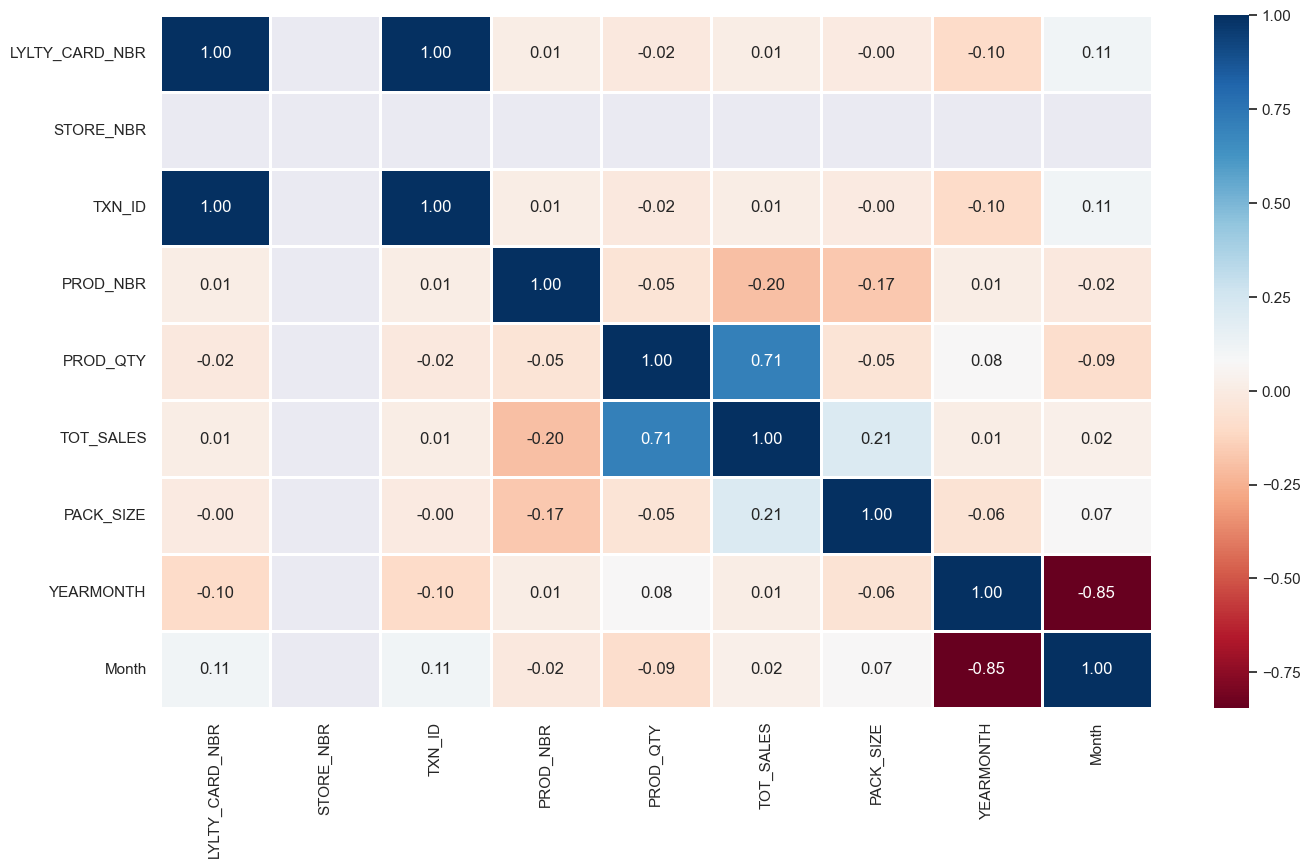

In [54]:
plt.figure(figsize=(16,9))
sns.heatmap(store77.corr(),cmap="RdBu",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [55]:
a = store86.groupby("Month")['TOT_SALES'].mean()

In [56]:
b = store88.groupby("Month")['TOT_SALES'].mean()

In [60]:
from scipy import stats

In [61]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-18.63190924456555, pvalue=5.826951690590806e-15)